In [3]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
movie_budgets.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [6]:
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [7]:
movie_budgets.shape

(5782, 6)

In [8]:
movie_budgets.iloc[0]

id                                1
release_date           Dec 18, 2009
movie                        Avatar
production_budget      $425,000,000
domestic_gross         $760,507,625
worldwide_gross      $2,776,345,279
Name: 0, dtype: object

In [9]:
movie_budgets[movie_budgets["movie"] == "Toy Story 3"]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
46,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"


In [10]:
movie_budgets["domestic_gross"]= movie_budgets["domestic_gross"].str.replace("$","")
movie_budgets["domestic_gross"]= movie_budgets["domestic_gross"].str.replace(",","")
movie_budgets["domestic_gross"]= movie_budgets["domestic_gross"].astype('int64', copy = False)

/var/folders/cz/dztysmpn7sgfqcz6vr1t0vs00000gp/T/ipykernel_42708/2112929706.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets["domestic_gross"]= movie_budgets["domestic_gross"].str.replace("$","")


In [11]:
movie_budgets["worldwide_gross"]= movie_budgets["worldwide_gross"].str.replace("$","")
movie_budgets["worldwide_gross"]= movie_budgets["worldwide_gross"].str.replace(",","")
movie_budgets["worldwide_gross"]= movie_budgets["worldwide_gross"].astype('int64', copy = False)

/var/folders/cz/dztysmpn7sgfqcz6vr1t0vs00000gp/T/ipykernel_42708/576131806.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets["worldwide_gross"]= movie_budgets["worldwide_gross"].str.replace("$","")


In [12]:
movie_budgets["production_budget"]= movie_budgets["production_budget"].str.replace("$","")
movie_budgets["production_budget"]= movie_budgets["production_budget"].str.replace(",","")
movie_budgets["production_budget"]= movie_budgets["production_budget"].astype('int64', copy = False)

/var/folders/cz/dztysmpn7sgfqcz6vr1t0vs00000gp/T/ipykernel_42708/3042572743.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets["production_budget"]= movie_budgets["production_budget"].str.replace("$","")


In [13]:
movie_budgets.head()
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [14]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [15]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [16]:
movie_budgets["foreign_gross"] = movie_budgets["worldwide_gross"]  - movie_budgets["domestic_gross"]

In [17]:
movie_budgets["domestic_profit"] = movie_budgets["domestic_gross"] - movie_budgets["production_budget"]
movie_budgets["foreign_profit"] = movie_budgets["foreign_gross"] - movie_budgets["production_budget"]
movie_budgets["worldwide_profit"] = movie_budgets["worldwide_gross"] - movie_budgets["production_budget"]

In [18]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,worldwide_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,335507625,1590837654,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,-169536125,394000000,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-307237650,-243000000,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,128405868,613408095,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,303181382,379540365,999721747


In [19]:
movie_budgets_clean = movie_budgets.to_csv("zippedData/movie_budgets_clean.csv", )

In [20]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,worldwide_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,335507625,1590837654,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,-169536125,394000000,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-307237650,-243000000,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,128405868,613408095,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,303181382,379540365,999721747


In [21]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,worldwide_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,335507625,1590837654,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,-169536125,394000000,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-307237650,-243000000,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,128405868,613408095,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,303181382,379540365,999721747
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,0,-7000,-7000,-7000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,192013,42482,186013,234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,0,-3662,-5000,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0,-1400,-1400,-1400


In [22]:
movie_budgets['domestic_profit_percentages'] = movie_budgets['production_budget']/movie_budgets['domestic_profit']
movie_budgets['foreign_profit_percentages'] = movie_budgets['production_budget']/movie_budgets['foreign_profit']
movie_budgets['worldwide_profit_percentages'] = movie_budgets['production_budget']/movie_budgets['worldwide_profit']

In [23]:
movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,worldwide_profit,domestic_profit_percentages,foreign_profit_percentages,worldwide_profit_percentages
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5782.000000,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,4.961413e+07,1.028557e+07,1.802638e+07,5.989970e+07,-0.742550,inf,0.845437
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,1.131192e+08,4.992137e+07,8.673950e+07,1.460889e+08,107.246894,NaN,64.675287
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-3.072376e+08,-2.430000e+08,-2.002376e+08,-7602.635580,-659.978881,-900.030317
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,0.000000e+00,-9.132757e+06,-1.261772e+07,-2.189071e+06,-1.418658,-1.133689,-1.048707
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,5.701766e+06,-3.487755e+05,-2.000000e+06,8.550286e+06,-1.000000,-1.000000,0.187608
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,4.682110e+07,1.778144e+07,1.198268e+07,6.096850e+07,0.736225,0.441828,0.673397
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.015838e+09,6.306622e+08,1.590838e+09,2.351345e+09,1779.359431,inf,3766.951281


In [24]:
def m_classify(profit):
    if profit <= 0:
        return 'big loser'
    elif profit > 0 and profit < .1:
        return 'scraped-by'
    else:
        return 'winner'

In [25]:
movie_budgets['winners & losers'] = movie_budgets['worldwide_profit_percentages'].map(m_classify)

In [26]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            5782 non-null   int64  
 1   release_date                  5782 non-null   object 
 2   movie                         5782 non-null   object 
 3   production_budget             5782 non-null   int64  
 4   domestic_gross                5782 non-null   int64  
 5   worldwide_gross               5782 non-null   int64  
 6   foreign_gross                 5782 non-null   int64  
 7   domestic_profit               5782 non-null   int64  
 8   foreign_profit                5782 non-null   int64  
 9   worldwide_profit              5782 non-null   int64  
 10  domestic_profit_percentages   5782 non-null   float64
 11  foreign_profit_percentages    5782 non-null   float64
 12  worldwide_profit_percentages  5782 non-null   float64
 13  win

In [27]:
def m_categories(budget):
    if budget <= 5000000:
        return 'small'
    elif budget > 5000000 and budget < 17000000:
        return 'medium'
    else:
        return 'large'

In [28]:
movie_budgets['budget_size'] = movie_budgets['production_budget'].map(m_categories)

In [29]:
movie_budgets.iloc[1]

id                                                                        2
release_date                                                   May 20, 2011
movie                           Pirates of the Caribbean: On Stranger Tides
production_budget                                                 410600000
domestic_gross                                                    241063875
worldwide_gross                                                  1045663875
foreign_gross                                                     804600000
domestic_profit                                                  -169536125
foreign_profit                                                    394000000
worldwide_profit                                                  635063875
domestic_profit_percentages                                       -2.421903
foreign_profit_percentages                                         1.042132
worldwide_profit_percentages                                       0.646549
winners & lo

In [30]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            5782 non-null   int64  
 1   release_date                  5782 non-null   object 
 2   movie                         5782 non-null   object 
 3   production_budget             5782 non-null   int64  
 4   domestic_gross                5782 non-null   int64  
 5   worldwide_gross               5782 non-null   int64  
 6   foreign_gross                 5782 non-null   int64  
 7   domestic_profit               5782 non-null   int64  
 8   foreign_profit                5782 non-null   int64  
 9   worldwide_profit              5782 non-null   int64  
 10  domestic_profit_percentages   5782 non-null   float64
 11  foreign_profit_percentages    5782 non-null   float64
 12  worldwide_profit_percentages  5782 non-null   float64
 13  win

In [31]:
dc = movie_budgets.groupby('budget_size')

In [32]:
small_films = dc.get_group('small')

In [33]:
med_films = dc.get_group('medium')

In [34]:
lg_films = dc.get_group('large')

In [35]:
small_films.describe()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,worldwide_profit,domestic_profit_percentages,foreign_profit_percentages,worldwide_profit_percentages
count,1535.000000,1.535000e+03,1.535000e+03,1.535000e+03,1.535000e+03,1.535000e+03,1.535000e+03,1.535000e+03,1535.000000,1535.000000,1535.000000
mean,50.830619,2.105793e+06,7.240659e+06,1.144287e+07,4.202207e+06,5.134866e+06,2.096414e+06,9.337074e+06,0.924315,inf,1.769723
std,28.666995,1.618336e+06,1.871642e+07,3.116985e+07,1.621417e+07,1.842452e+07,1.601829e+07,3.085102e+07,47.719398,NaN,56.973594
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.000000e+06,-5.000000e+06,-5.000000e+06,-135.980419,-219.490781,-224.274406
25%,26.000000,6.540000e+05,2.270500e+03,1.275150e+04,0.000000e+00,-1.500000e+06,-2.500000e+06,-1.083322e+06,-1.037555,-1.000000,-1.016899
50%,51.000000,1.800000e+06,4.194280e+05,1.157672e+06,0.000000e+00,-2.127360e+05,-9.723960e+05,-4.416000e+03,-1.000000,-1.000000,-1.000000
75%,75.000000,3.500000e+06,6.037136e+06,9.488102e+06,8.480920e+05,3.796411e+06,-4.000000e+04,6.858036e+06,0.183656,-1.000000,0.232935
max,100.000000,5.000000e+06,2.414382e+08,3.905252e+08,2.152993e+08,2.364382e+08,2.117993e+08,3.866252e+08,1779.359431,inf,1779.359431


In [36]:
med_films

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,worldwide_profit,domestic_profit_percentages,foreign_profit_percentages,worldwide_profit_percentages,winners & losers,budget_size
2916,17,"Mar 11, 2016",The Young Messiah,16800000,6469813,7313697,843884,-10330187,-15956116,-9486303,-1.626302,-1.052888,-1.770974,big loser,medium
2917,18,"Nov 10, 2006",FUR: An Imaginary Portrait of Diane Arbus,16800000,223202,2281089,2057887,-16576798,-14742113,-14518911,-1.013465,-1.139592,-1.157112,big loser,medium
2918,19,"Nov 27, 1991",My Girl,16500000,58011485,58011485,0,41511485,-16500000,41511485,0.397480,-1.000000,0.397480,winner,medium
2919,20,"Dec 11, 1987",Wall Street,16500000,43848100,43848100,0,27348100,-16500000,27348100,0.603333,-1.000000,0.603333,winner,medium
2920,21,"Dec 11, 1995",Sense and Sensibility,16500000,42993774,134993774,92000000,26493774,75500000,118493774,0.622788,0.218543,0.139248,winner,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242,43,"Feb 24, 2017",The Girl with all the Gifts,5250000,0,4801837,4801837,-5250000,-448163,-448163,-1.000000,-11.714488,-11.714488,big loser,medium
4243,44,"Aug 1, 1944",Wilson,5200000,2000000,2000000,0,-3200000,-5200000,-3200000,-1.625000,-1.000000,-1.625000,big loser,medium
4244,45,"Aug 5, 2005",Saint Ralph,5200000,795126,1695126,900000,-4404874,-4300000,-3504874,-1.180510,-1.209302,-1.483648,big loser,medium
4245,46,"Apr 22, 2011",Dum Maaro Dum,5200000,564489,11633427,11068938,-4635511,5868938,6433427,-1.121775,0.886021,0.808278,winner,medium


In [37]:
lg_films

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,worldwide_profit,domestic_profit_percentages,foreign_profit_percentages,worldwide_profit_percentages,winners & losers,budget_size
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,335507625,1590837654,2351345279,1.266737,0.267155,0.180748,winner,large
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,-169536125,394000000,635063875,-2.421903,1.042132,0.646549,winner,large
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-307237650,-243000000,-200237650,-1.139183,-1.440329,-1.747923,big loser,large
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,128405868,613408095,1072413963,2.574649,0.538956,0.308276,winner,large
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,303181382,379540365,999721747,1.045579,0.835221,0.317088,winner,large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,12,"Jun 26, 2015",Escobar: Paradise Lost,17000000,195792,3917679,3721887,-16804208,-13278113,-13082321,-1.011651,-1.280302,-1.299464,big loser,large
2912,13,"Sep 26, 2017","Mune, le gardien de la lune",17000000,0,14534046,14534046,-17000000,-2465954,-2465954,-1.000000,-6.893884,-6.893884,big loser,large
2913,14,"Jun 23, 2009",Chasseurs de dragons,17000000,0,13446115,13446115,-17000000,-3553885,-3553885,-1.000000,-4.783497,-4.783497,big loser,large
2914,15,"Oct 21, 1977",Damnation Alley,17000000,0,0,0,-17000000,-17000000,-17000000,-1.000000,-1.000000,-1.000000,big loser,large


In [38]:
movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,worldwide_profit,domestic_profit_percentages,foreign_profit_percentages,worldwide_profit_percentages
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5782.000000,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,4.961413e+07,1.028557e+07,1.802638e+07,5.989970e+07,-0.742550,inf,0.845437
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,1.131192e+08,4.992137e+07,8.673950e+07,1.460889e+08,107.246894,NaN,64.675287
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-3.072376e+08,-2.430000e+08,-2.002376e+08,-7602.635580,-659.978881,-900.030317
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,0.000000e+00,-9.132757e+06,-1.261772e+07,-2.189071e+06,-1.418658,-1.133689,-1.048707
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,5.701766e+06,-3.487755e+05,-2.000000e+06,8.550286e+06,-1.000000,-1.000000,0.187608
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,4.682110e+07,1.778144e+07,1.198268e+07,6.096850e+07,0.736225,0.441828,0.673397
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.015838e+09,6.306622e+08,1.590838e+09,2.351345e+09,1779.359431,inf,3766.951281


In [39]:
def m_classify(profit):
    if profit <= 0:
        return 'loser'
    elif profit > 0 and profit < .5:
        return 'scraper'
    else:
        return 'winner'

In [40]:
movie_budgets['winners & losers'] = movie_budgets['worldwide_profit_percentages'].map(m_classify)

In [41]:
movie_budgets.iloc[5250]

id                                        51
release_date                    Sep 19, 2003
movie                           Bubba Ho-Tep
production_budget                    1000000
domestic_gross                       1239183
worldwide_gross                      1492895
foreign_gross                         253712
domestic_profit                       239183
foreign_profit                       -746288
worldwide_profit                      492895
domestic_profit_percentages         4.180899
foreign_profit_percentages         -1.339965
worldwide_profit_percentages         2.02883
winners & losers                      winner
budget_size                            small
Name: 5250, dtype: object

In [42]:
ec = movie_budgets.groupby('winners & losers')

In [43]:
wins = ec.get_group('winner')
loses = ec.get_group('loser')
scrapes = ec.get_group('scraper')

In [44]:
wins.describe()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,worldwide_profit,domestic_profit_percentages,foreign_profit_percentages,worldwide_profit_percentages
count,1802.000000,1.802000e+03,1.802000e+03,1.802000e+03,1.802000e+03,1.802000e+03,1.802000e+03,1.802000e+03,1802.000000,1802.000000,1802.000000
mean,50.183685,4.242973e+07,3.971601e+07,8.298525e+07,4.326925e+07,-2.713724e+06,8.395149e+05,4.055552e+07,-1.211004,inf,9.197523
std,29.298879,4.561374e+07,3.987650e+07,1.001193e+08,6.738973e+07,2.564110e+07,3.324921e+07,5.978897e+07,191.096054,NaN,108.327665
min,1.000000,3.000000e+04,0.000000e+00,8.269800e+04,0.000000e+00,-2.019413e+08,-9.706568e+07,3.490000e+02,-7602.635580,-486.765248,0.500000
25%,24.000000,1.110000e+07,1.149687e+07,1.996186e+07,1.352913e+06,-9.956334e+06,-1.400000e+07,5.784920e+06,-2.431840,-2.249974,0.735799
50%,50.000000,2.725000e+07,3.016541e+07,4.853714e+07,1.791256e+07,4.771385e+05,-3.792040e+06,1.854514e+07,0.699130,-1.000000,1.194358
75%,76.000000,5.800000e+07,5.439104e+07,1.050166e+08,5.304250e+07,9.377684e+06,5.285599e+06,5.014482e+07,2.597791,1.598490,2.517023
max,100.000000,4.106000e+08,2.910455e+08,1.045664e+09,8.046000e+08,1.370448e+08,3.940000e+08,6.350639e+08,1779.359431,inf,3766.951281


In [45]:
loses.describe()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,worldwide_profit,domestic_profit_percentages,foreign_profit_percentages,worldwide_profit_percentages
count,2125.000000,2.125000e+03,2.125000e+03,2.125000e+03,2.125000e+03,2.125000e+03,2.125000e+03,2.125000e+03,2125.000000,2125.000000,2125.000000
mean,48.722824,1.978216e+07,6.225800e+06,9.818276e+06,3.592475e+06,-1.355636e+07,-1.618969e+07,-9.963886e+06,-2.069797,-1.250212,-5.704893
std,28.677830,2.572514e+07,1.092914e+07,1.866191e+07,1.045129e+07,1.888039e+07,1.942846e+07,1.384712e+07,5.454934,1.277880,36.496626
min,1.000000,1.400000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-3.072376e+08,-2.430000e+08,-2.002376e+08,-135.980419,-47.975045,-900.030317
25%,24.000000,2.500000e+06,3.200000e+03,3.209200e+04,0.000000e+00,-1.775400e+07,-2.300000e+07,-1.297782e+07,-1.650149,-1.165960,-2.434638
50%,47.000000,1.000000e+07,6.090420e+05,1.695126e+06,0.000000e+00,-7.106334e+06,-9.561299e+06,-5.000000e+06,-1.122188,-1.000000,-1.294118
75%,73.000000,2.700000e+07,8.135024e+06,1.206972e+07,1.846701e+06,-1.979000e+06,-2.200000e+06,-1.478413e+06,-1.001219,-1.000000,-1.016077
max,100.000000,3.500000e+08,1.002897e+08,2.600021e+08,1.707000e+08,-1.400000e+03,-1.400000e+03,-7.580000e+02,-1.000000,-1.000000,-1.000000


In [46]:
fc = wins.groupby('budget_size')

In [47]:
fc.get_group('small').describe()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,worldwide_profit,domestic_profit_percentages,foreign_profit_percentages,worldwide_profit_percentages
count,253.000000,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,253.000000,253.000000,253.000000
mean,42.802372,2.646129e+06,3.463031e+06,4.922248e+06,1.459217e+06,8.169022e+05,-1.186911e+06,2.276119e+06,10.647183,inf,17.290865
std,28.174211,1.596550e+06,3.573803e+06,3.611049e+06,2.345175e+06,2.873796e+06,2.265620e+06,2.368655e+06,116.663483,NaN,138.365949
min,1.000000,3.000000e+04,0.000000e+00,8.269800e+04,0.000000e+00,-5.000000e+06,-5.000000e+06,3.490000e+02,-67.640693,-219.490781,0.500000
25%,19.000000,1.200000e+06,6.172280e+05,1.945420e+06,0.000000e+00,-5.229980e+05,-2.785869e+06,4.196690e+05,-1.125264,-1.201359,0.738831
50%,39.000000,2.627000e+06,2.276368e+06,4.230426e+06,2.200850e+05,3.087070e+05,-1.024024e+06,1.250934e+06,0.729072,-1.000000,1.427099
75%,63.000000,4.000000e+06,5.363000e+06,7.200000e+06,1.990888e+06,2.000000e+06,-5.139800e+04,3.715361e+06,2.072871,-1.000000,3.737995
max,100.000000,5.000000e+06,1.500000e+07,1.500000e+07,1.012560e+07,1.000000e+07,5.723533e+06,1.000000e+07,1779.359431,inf,1779.359431


In [48]:
gc = loses.groupby('budget_size')
gc.get_group('small').describe()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,worldwide_profit,domestic_profit_percentages,foreign_profit_percentages,worldwide_profit_percentages
count,772.000000,7.720000e+02,7.720000e+02,7.720000e+02,7.720000e+02,7.720000e+02,7.720000e+02,7.720000e+02,772.000000,772.000000,772.000000
mean,52.411917,1.880830e+06,2.198690e+05,3.248778e+05,1.050088e+05,-1.660961e+06,-1.775821e+06,-1.555952e+06,-1.727436,-1.101944,-2.253202
std,27.571226,1.557664e+06,5.989950e+05,7.445019e+05,3.721986e+05,1.453655e+06,1.491818e+06,1.403309e+06,6.248252,0.599358,10.186422
min,1.000000,1.400000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.000000e+06,-5.000000e+06,-5.000000e+06,-135.980419,-11.580964,-224.274406
25%,30.750000,5.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,-2.669580e+06,-2.983338e+06,-2.500000e+06,-1.107248,-1.001717,-1.246996
50%,53.000000,1.500000e+06,4.619500e+03,1.306500e+04,0.000000e+00,-1.193960e+06,-1.300000e+06,-1.074726e+06,-1.004179,-1.000000,-1.016215
75%,75.000000,3.000000e+06,1.345700e+05,2.489865e+05,2.040000e+03,-4.555220e+05,-5.000000e+05,-3.947322e+05,-1.000000,-1.000000,-1.000000
max,100.000000,5.000000e+06,4.816142e+06,4.816142e+06,4.568257e+06,-1.400000e+03,-1.400000e+03,-7.580000e+02,-1.000000,-1.000000,-1.000000


In [49]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,worldwide_profit,domestic_profit_percentages,foreign_profit_percentages,worldwide_profit_percentages,winners & losers,budget_size
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,335507625,1590837654,2351345279,1.266737,0.267155,0.180748,scraper,large
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,-169536125,394000000,635063875,-2.421903,1.042132,0.646549,winner,large
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-307237650,-243000000,-200237650,-1.139183,-1.440329,-1.747923,loser,large
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,128405868,613408095,1072413963,2.574649,0.538956,0.308276,scraper,large
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,303181382,379540365,999721747,1.045579,0.835221,0.317088,scraper,large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,0,-7000,-7000,-7000,-1.000000,-1.000000,-1.000000,loser,small
5778,79,"Apr 2, 1999",Following,6000,48482,240495,192013,42482,186013,234495,0.141236,0.032256,0.025587,scraper,small
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,0,-3662,-5000,-3662,-1.365374,-1.000000,-1.365374,loser,small
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0,-1400,-1400,-1400,-1.000000,-1.000000,-1.000000,loser,small


In [50]:
data = {'film_sizes': ['small', 'medium', 'large'],
        'percentage_means': [1.769723, 0.120114, 0.700102]}
film_comp = pd.DataFrame(data)

In [51]:
film_comp

,film_sizes,percentage_means
0,small,1.769723
1,medium,0.120114
2,large,0.700102


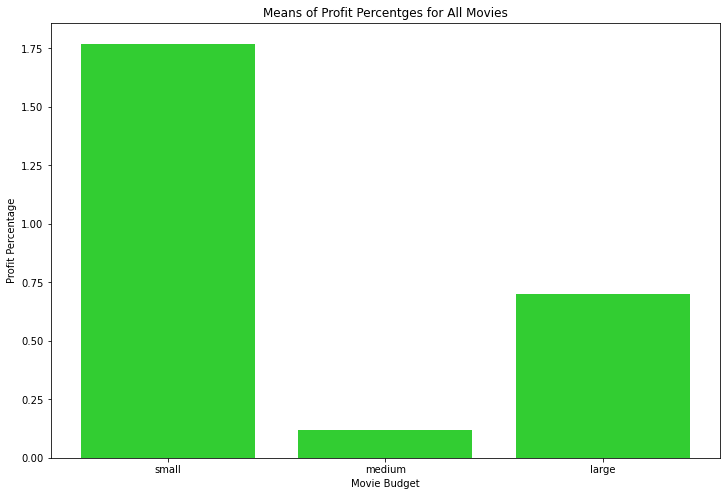

In [68]:
fig, ax = plt.subplots(figsize = (12, 8))
 
# creating the bar plot
ax.bar(film_comp['film_sizes'], film_comp['percentage_means'], color=['limegreen', 'limegreen', 'limegreen'])
 
ax.set_xlabel("Movie Budget")
ax.set_ylabel("Profit Percentage")
ax.set_title("Means of Profit Percentges for All Movies")
# Show the plot
plt.show()

In [71]:
movie_budgets.shape

(5782, 15)

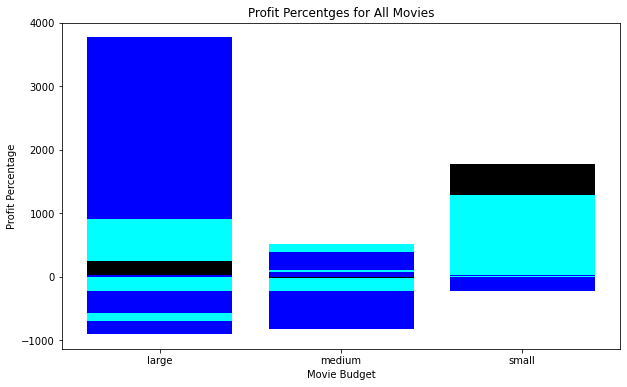

In [53]:
fig, ax = plt.subplots(figsize = (10, 6))
 
# creating the bar plot
ax.bar(movie_budgets['budget_size'], movie_budgets['worldwide_profit_percentages'], color=['black', 'blue', 'cyan'])
 
ax.set_xlabel("Movie Budget")
ax.set_ylabel("Profit Percentage")
ax.set_title("Profit Percentges for All Movies")
 
# Show the plot
plt.show()

In [54]:
pip install Glyph 128 (\x80), Glyph 153 (\x99)

zsh:1: no matches found: (x80),
Note: you may need to restart the kernel to use updated packages.


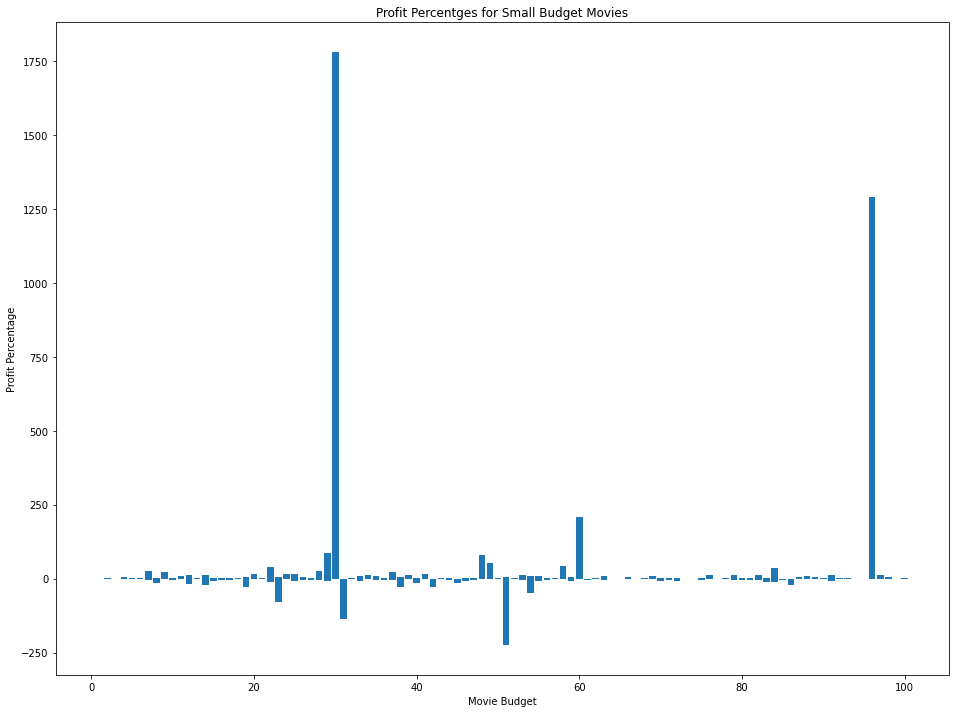

In [55]:
fig, bx = plt.subplots(figsize = (16, 12))
 
# creating the bar plot
bx.bar(small_films['id'], small_films['worldwide_profit_percentages'])
 
bx.set_xlabel("Movie Budget")
bx.set_ylabel("Profit Percentage")
bx.set_title("Profit Percentges for Small Budget Movies")
 
# Show the plot
plt.show()

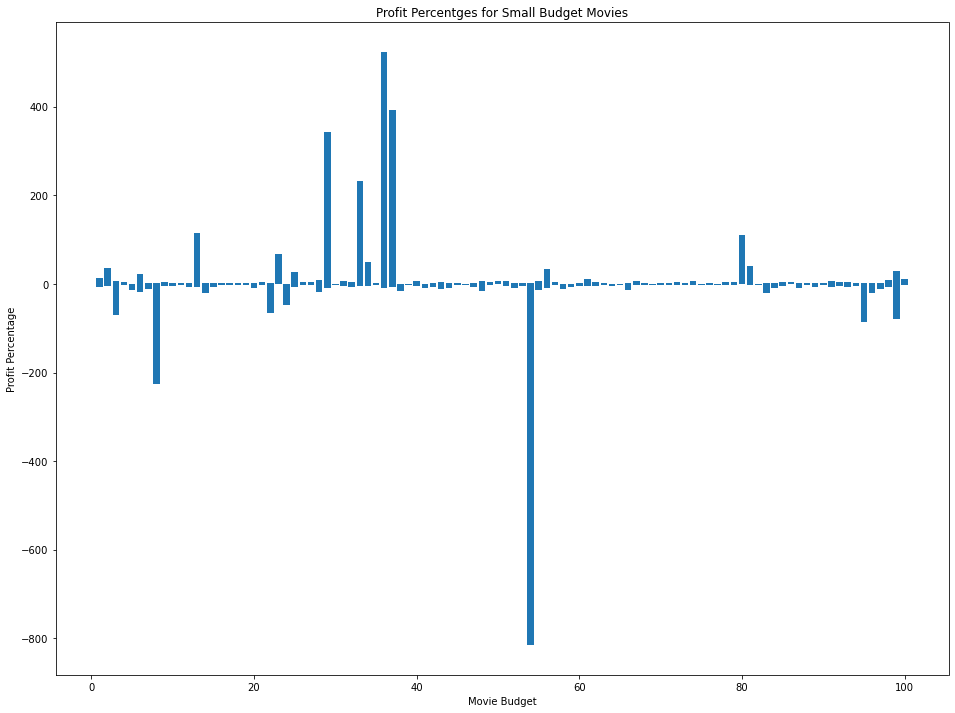

In [56]:
fig, bx = plt.subplots(figsize = (16, 12))
 
# creating the bar plot
bx.bar(med_films['id'], med_films['worldwide_profit_percentages'])
 
bx.set_xlabel("Movie Budget")
bx.set_ylabel("Profit Percentage")
bx.set_title("Profit Percentges for Small Budget Movies")
 
# Show the plot
plt.show()

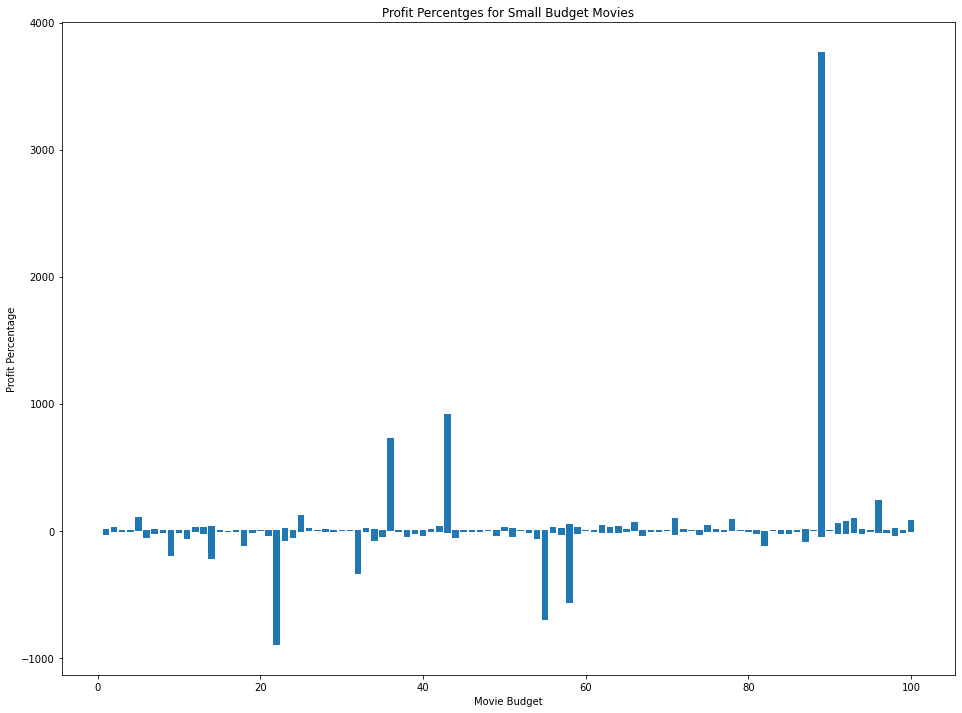

In [57]:
fig, bx = plt.subplots(figsize = (16, 12))
 
# creating the bar plot
bx.bar(lg_films['id'], lg_films['worldwide_profit_percentages'])
 
bx.set_xlabel("Movie Budget")
bx.set_ylabel("Profit Percentage")
bx.set_title("Profit Percentges for Small Budget Movies")
 
# Show the plot
plt.show()